# 💊 **Topic Modeling From Personalized Medicine: Redefining Cancer Treatment**  

**Dataset มาจาก:** https://www.kaggle.com/competitions/msk-redefining-cancer-treatment/data

**Objective:** เพื่อศึกษาว่าใน Dataset นี้ แต่ละ Class (ทั้ง 9 class) สื่อถึงอะไร โดยใช้การทำ Topic Modeling 

## **1. Data Understanding:** 📦

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Train set

In [ ]:
import pandas as pd

In [ ]:
#train_variants = pd.read_csv('training_variants.csv')
train_variants = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/CHHD304 Project/training_variants.csv')
train_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
train_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [ ]:
#ตรวจสอบ na ในข้อมูล
train_variants.isna().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

In [ ]:
# พอดีไฟล์นี้มันเปิดอ่านแบบไฟล์ด้านบนไม่ได้ เลยต้องใส่เงื่อนไขเพิ่มถึงจะอ่านไฟล์ได้จ้า
train_text = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/CHHD304 Project/training_text.csv',sep="\|\|", names=["ID","TEXT"],skiprows=1)
train_text.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3321 non-null   int64 
 1   TEXT    3316 non-null   object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [ ]:
#ตรวจสอบ na ในข้อมูล
train_text.isna().sum()

ID      0
TEXT    5
dtype: int64

In [ ]:
#จัดการกับ na ในข้อมูล โดยเติม unknown เข้าไป
train_text['TEXT'].fillna('unknown',inplace=True)

In [ ]:
#ตรวจสอบ na ในข้อมูล
train_text.isna().sum()

ID      0
TEXT    0
dtype: int64

In [ ]:
# merge ไฟล์ทั้งสอง
train_merge = pd.merge(train_variants, train_text, on='ID')
train_merge.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
# save file ออกเป็น .xlsx เพื่อเอาไป plot ใน tableau เสย ๆ 
#train_merge.to_excel('train_merge.xlsx', index=False)

---

### ดูความยาวของ Text

In [ ]:
train_merge[['Gene','Variation']].describe(include='O').T

,count,unique,top,freq
Gene,3321,264,BRCA1,264
Variation,3321,2996,Truncating Mutations,93


In [ ]:
# เพิ่ม col length 
train_merge['length'] = train_merge['TEXT'].str.len()

In [ ]:
train_merge

,ID,Gene,Variation,Class,TEXT,length
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,39672
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,36691
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,36691
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,36238
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,41308
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,73895
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,40127
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,36200
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,32520


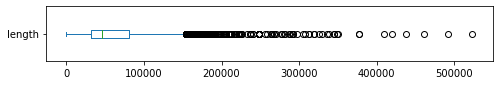

In [ ]:
train_merge['length'].plot(kind='box', vert=False, figsize=(8, 1))

In [ ]:
train_merge[train_merge['length']>=400000]

,ID,Gene,Variation,Class,TEXT,length
200,200,EGFR,L861Q,7,Purpose: Clinical features of epidermal growth...,460446
908,908,PDGFRA,D842V,7,Purpose: Platelet-derived growth factor recept...,409756
1195,1195,PIK3CA,H1047R,7,Activation of the phosphoinositide 3-kinase (P...,523393
1198,1198,PIK3CA,Amplification,2,Ovarian cancer is the fifth-leading cause of c...,419966
1242,1242,YAP1,Amplification,7,The development of array comparative genomic h...,438030
1530,1530,ALK,F1174L,7,"In the era of personalized medicine, understan...",492326


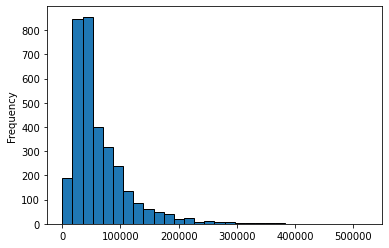

In [ ]:
train_merge['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')

## **2. Data Preparation** 

### Train set

In [ ]:
import nltk
import re

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
#stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def tokenize(text):
    return re.sub('[^a-zA-Z0-9\n]', ' ', text) # เท่าที่เข้าใจคือจะแทนที่ทุกตัวที่ไม่ใช่ a-z, A-Z, 0-9, \n ด้วย ' '

In [ ]:
pipeline = [str, tokenize]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [ ]:
train_merge['TEXT_cleaned'] = train_merge['TEXT'].apply(prepare, pipeline = pipeline) # ใช้ prepare() function

In [ ]:
# ทำให้ str เป็นตัวพิมพ์เล็ก
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.lower()

In [ ]:
# ลบ stopwords ออก
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stopwords))

In [ ]:
# ลบ et al ออก 
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.replace(r'et al', ' ', regex=True)
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.replace(r'table', ' ', regex=True)
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.replace(r'fig', ' ', regex=True)
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.replace(r'figure', ' ', regex=True)
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.replace(r'figure', ' ', regex=True)

In [ ]:
# ลบ spacebar หลาย ๆ ครั้งออก
train_merge['TEXT_cleaned'] = train_merge['TEXT_cleaned'].str.replace(r'\s+', ' ', regex=True)

In [ ]:
# ตัดแบ่งคำ ไว้ใน col ใหม่ tokens_word
train_merge['tokens_word'] = train_merge['TEXT_cleaned'].str.split()

In [ ]:
train_merge

,ID,Gene,Variation,Class,TEXT,TEXT_cleaned,tokens_word
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin dependent kinases cdks regulate variety...,"[cyclin, dependent, kinases, cdks, regulate, v..."
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,..."
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,..."
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evidence demonstrated acquired uniparen...,"[recent, evidence, demonstrated, acquired, uni..."
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogenic mutations monomeric casitas b lineag...,"[oncogenic, mutations, monomeric, casitas, b, ..."
...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds..."
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds..."
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt related transcription factor 1 gene runx1...,"[runt, related, transcription, factor, 1, gene..."
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1 aml1 gene frequent target chromosomal tr...,"[runx1, aml1, gene, frequent, target, chromoso..."


### ทำ Lemmatisation

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemmatize(s):
    s = [wnl.lemmatize(word) for word in s]
    return s

train_merge = train_merge.assign(tokens_word_lemma = train_merge.tokens_word.apply(lambda x: lemmatize(x)))

In [ ]:
train_merge

,ID,Gene,Variation,Class,TEXT,TEXT_cleaned,tokens_word,tokens_word_lemma
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin dependent kinases cdks regulate variety...,"[cyclin, dependent, kinases, cdks, regulate, v...","[cyclin, dependent, kinase, cdks, regulate, va..."
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,...","[abstract, background, non, small, cell, lung,..."
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,...","[abstract, background, non, small, cell, lung,..."
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evidence demonstrated acquired uniparen...,"[recent, evidence, demonstrated, acquired, uni...","[recent, evidence, demonstrated, acquired, uni..."
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogenic mutations monomeric casitas b lineag...,"[oncogenic, mutations, monomeric, casitas, b, ...","[oncogenic, mutation, monomeric, casitas, b, l..."
...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds...","[introduction, myelodysplastic, syndrome, md, ..."
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds...","[introduction, myelodysplastic, syndrome, md, ..."
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt related transcription factor 1 gene runx1...,"[runt, related, transcription, factor, 1, gene...","[runt, related, transcription, factor, 1, gene..."
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1 aml1 gene frequent target chromosomal tr...,"[runx1, aml1, gene, frequent, target, chromoso...","[runx1, aml1, gene, frequent, target, chromoso..."


In [ ]:
# save file ออกเป็น .xlsx
#train_merge.to_excel('train_merge_cleaned.xlsx', index=False)

### word len 

In [ ]:
train_merge['num_tokens'] = train_merge['tokens_word_lemma'].map(len)

In [ ]:
train_merge

,ID,Gene,Variation,Class,TEXT,TEXT_cleaned,tokens_word,tokens_word_lemma,num_tokens
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin dependent kinases cdks regulate variety...,"[cyclin, dependent, kinases, cdks, regulate, v...","[cyclin, dependent, kinase, cdks, regulate, va...",4294
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,...","[abstract, background, non, small, cell, lung,...",4129
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,...","[abstract, background, non, small, cell, lung,...",4129
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evidence demonstrated acquired uniparen...,"[recent, evidence, demonstrated, acquired, uni...","[recent, evidence, demonstrated, acquired, uni...",3835
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogenic mutations monomeric casitas b lineag...,"[oncogenic, mutations, monomeric, casitas, b, ...","[oncogenic, mutation, monomeric, casitas, b, l...",4197
...,...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds...","[introduction, myelodysplastic, syndrome, md, ...",8112
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds...","[introduction, myelodysplastic, syndrome, md, ...",4473
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt related transcription factor 1 gene runx1...,"[runt, related, transcription, factor, 1, gene...","[runt, related, transcription, factor, 1, gene...",4568
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1 aml1 gene frequent target chromosomal tr...,"[runx1, aml1, gene, frequent, target, chromoso...","[runx1, aml1, gene, frequent, target, chromoso...",3335


### ทำ words count 

In [ ]:
from collections import Counter

def count_words(df, column='tokens_word_lemma', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [ ]:
text = train_merge
freq_text = count_words(text)

freq_text.head(20)

,freq
token,
mutation,343846
cell,312490
1,215596
2,154499
3,135431
mutant,126586
protein,125359
tumor,122770
cancer,120103


In [ ]:
freq_text = freq_text.drop(['0','1','2','3','4','5','6','7','8','9','10','et','al','c'])
freq_text.head(20)

,freq
token,
mutation,343846
cell,312490
mutant,126586
protein,125359
tumor,122770
cancer,120103
patient,111374
gene,102268
ure,99047


### ทำ wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "white", colormap="tab20b", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

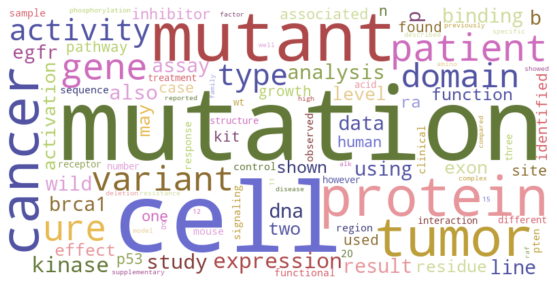

In [ ]:
plt.figure(figsize=(15,5))
wordcloud(freq_text['freq'], max_words=100)

## **3. Modeling** 

In [ ]:
train_merge

,ID,Gene,Variation,Class,TEXT,TEXT_cleaned,tokens_word,tokens_word_lemma,num_tokens
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,cyclin dependent kinases cdks regulate variety...,"[cyclin, dependent, kinases, cdks, regulate, v...","[cyclin, dependent, kinase, cdks, regulate, va...",4294
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,...","[abstract, background, non, small, cell, lung,...",4129
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,abstract background non small cell lung cance...,"[abstract, background, non, small, cell, lung,...","[abstract, background, non, small, cell, lung,...",4129
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,recent evidence demonstrated acquired uniparen...,"[recent, evidence, demonstrated, acquired, uni...","[recent, evidence, demonstrated, acquired, uni...",3835
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,oncogenic mutations monomeric casitas b lineag...,"[oncogenic, mutations, monomeric, casitas, b, ...","[oncogenic, mutation, monomeric, casitas, b, l...",4197
...,...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds...","[introduction, myelodysplastic, syndrome, md, ...",8112
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,introduction myelodysplastic syndromes mds het...,"[introduction, myelodysplastic, syndromes, mds...","[introduction, myelodysplastic, syndrome, md, ...",4473
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,runt related transcription factor 1 gene runx1...,"[runt, related, transcription, factor, 1, gene...","[runt, related, transcription, factor, 1, gene...",4568
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,runx1 aml1 gene frequent target chromosomal tr...,"[runx1, aml1, gene, frequent, target, chromoso...","[runx1, aml1, gene, frequent, target, chromoso...",3335


In [ ]:
Data_class_1 =  train_merge.query('Class == 1')
#Data_class_1
Data_class_2 =  train_merge.query('Class == 2')
Data_class_3 =  train_merge.query('Class == 3')
Data_class_4 =  train_merge.query('Class == 4')
Data_class_5 =  train_merge.query('Class == 5')
Data_class_6 =  train_merge.query('Class == 6')
Data_class_7 =  train_merge.query('Class == 7')
Data_class_8 =  train_merge.query('Class == 8')
Data_class_9 =  train_merge.query('Class == 9')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=9, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

## Class 1 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_1['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['15',
 'activation',
 'activity',
 'amino',
 'assay',
 'assays',
 'associated',
 'binding',
 'brca1',
 'breast',
 'cancer',
 'cases',
 'complex',
 'control',
 'deletion',
 'different',
 'dna',
 'domain',
 'exon',
 'family',
 'functional',
 'genes',
 'human',
 'levels',
 'lines',
 'loss',
 'missense',
 'mutant',
 'mutants',
 'p53',
 'patients',
 'proteins',
 'region',
 'residues',
 'sequence',
 'shown',
 'site',
 'smad3',
 'structure',
 'studies',
 'supplementary',
 'transcriptional',
 'tsc2',
 'tumor',
 'tumors',
 'ure',
 'used',
 'variant',
 'variants',
 'wild']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
ure domain binding proteins mutant dna activity wild mutants residues
Topic #1:
patients exon cancer deletion cases dna family genes ure associated
Topic #2:
tumor tumors cancer ure genes loss lines supplementary dna human
Topic #3:
p53 dna binding wild domain mutant ure site mutants levels
Topic #4:
binding smad3 complex proteins tsc2 wild ure amino domain activity
Topic #5:
p53 mutant mutants wild activity dna domain binding cancer transcriptional
Topic #6:
tsc2 variants variant wild amino ure control assay cases different
Topic #7:
brca1 breast cancer dna transcriptional binding activation wild domain structure
Topic #8:
variants cancer functional assays variant brca1 missense binding assay used



## Class 2

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_2['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['11',
 '20',
 'activation',
 'activity',
 'associated',
 'binding',
 'braf',
 'cancer',
 'cases',
 'clinical',
 'dna',
 'domain',
 'egfr',
 'exon',
 'expression',
 'fusion',
 'gene',
 'genes',
 'growth',
 'identified',
 'imatinib',
 'kinase',
 'kit',
 'lines',
 'met',
 'mutant',
 'mutants',
 'mutation',
 'mutations',
 'notch',
 'number',
 'observed',
 'pathway',
 'patient',
 'patients',
 'protein',
 'raf',
 'ras',
 'resistance',
 'response',
 'samples',
 'shown',
 'signaling',
 'study',
 'treatment',
 'tumor',
 'tumors',
 'type',
 'ure',
 'wild']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
gene expression cancer fusion genes ure tumor tumors protein cases
Topic #1:
kinase mutations mutant activity domain mutants protein activation type mutation
Topic #2:
braf ras raf met mutations activation kinase ure cancer activity
Topic #3:
patients patient mutations kinase clinical treatment domain fusion response gene
Topic #4:
resistance ure mutations mutation tumor pathway tumors treatment clinical identified
Topic #5:
kit mutations imatinib patients exon mutation 11 resistance response kinase
Topic #6:
notch signaling mutations pathway domain tumor cancer activation expression growth
Topic #7:
egfr mutations patients exon mutation response 20 clinical treatment study
Topic #8:
mutations mutation patients cancer tumor tumors dna mutant ure type



## Class 3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_3['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['acid',
 'activating',
 'activation',
 'alk',
 'amino',
 'analyzed',
 'assay',
 'assays',
 'associated',
 'based',
 'binding',
 'brca1',
 'breast',
 'control',
 'dna',
 'erbb4',
 'expressing',
 'flt3',
 'function',
 'functional',
 'gene',
 'growth',
 'human',
 'identified',
 'kinase',
 'levels',
 'missense',
 'mtor',
 'mutants',
 'neutral',
 'patients',
 'pdgfra',
 'phosphorylation',
 'proteins',
 'pten',
 'receptor',
 'recombination',
 'repair',
 'residues',
 'sequence',
 'signaling',
 'ssa',
 'study',
 'supplementary',
 'tsc1',
 'tumor',
 'variant',
 'variants',
 'vus',
 'wt']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
flt3 kinase dna sequence signaling activation expressing patients phosphorylation identified
Topic #1:
alk variants brca1 activating variant patients functional kinase tsc1 assays
Topic #2:
brca1 variants erbb4 assay ssa recombination repair variant missense mutants
Topic #3:
brca1 variants assay vus functional neutral assays variant dna function
Topic #4:
mtor activating supplementary signaling amino mutants identified brca1 variants wt
Topic #5:
alk pten mutants human kinase patients activation tumor function growth
Topic #6:
tsc1 variants missense identified phosphorylation variant amino gene patients mtor
Topic #7:
pdgfra patients receptor breast kinase wt mutants phosphorylation growth gene
Topic #8:
binding growth recombination vus tumor assay wt missense breast human



## Class 4


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_4['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['20',
 'acid',
 'activation',
 'activity',
 'amino',
 'assay',
 'assays',
 'associated',
 'binding',
 'brca1',
 'cancer',
 'catalytic',
 'control',
 'described',
 'dna',
 'domain',
 'function',
 'functional',
 'genes',
 'growth',
 'identified',
 'interaction',
 'kinase',
 'levels',
 'loss',
 'missense',
 'mm',
 'mutant',
 'mutants',
 'p53',
 'patients',
 'phosphatase',
 'proteins',
 'pten',
 'ras',
 'residues',
 'sequence',
 'site',
 'spop',
 'study',
 'supplementary',
 'transfected',
 'tumor',
 'tumors',
 'ure',
 'used',
 'variant',
 'variants',
 'wild',
 'wt']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
dna patients cancer tumors genes binding domain site ure tumor
Topic #1:
activity catalytic residues kinase acid amino proteins mutant function phosphatase
Topic #2:
ure tumor genes cancer supplementary tumors mutant identified domain loss
Topic #3:
brca1 ras cancer activation activity assay ure function loss dna
Topic #4:
variants variant functional missense assays wild assay binding function activity
Topic #5:
mutants wt p53 mutant cancer patients activity function associated ure
Topic #6:
binding ure proteins domain mutant wild mutants activity interaction mm
Topic #7:
p53 mutant dna binding mutants ure cancer wild activity domain
Topic #8:
pten spop phosphatase activity tumor ure patients associated cancer proteins



## Class 5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_5['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['activation',
 'assay',
 'assays',
 'associated',
 'author',
 'binding',
 'brca1',
 'brca2',
 'brct',
 'breast',
 'class',
 'classification',
 'clinical',
 'control',
 'deleterious',
 'dna',
 'domain',
 'domains',
 'effect',
 'family',
 'functional',
 'genes',
 'genetic',
 'human',
 'kinase',
 'known',
 'levels',
 'likely',
 'missense',
 'mutant',
 'mutants',
 'neutral',
 'number',
 'pathogenic',
 'patients',
 'proteins',
 'residues',
 'risk',
 'sensitivity',
 'sequence',
 'structure',
 'studies',
 'supplementary',
 'tumor',
 'tumors',
 'ure',
 'variant',
 'variants',
 'vus',
 'wild']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
brca1 vus variants neutral deleterious brca2 functional assays assay sequence
Topic #1:
variants variant classification class pathogenic clinical family missense functional assay
Topic #2:
ure dna structure residues variants kinase binding supplementary proteins studies
Topic #3:
domain dna breast binding residues studies domains proteins number wild
Topic #4:
variants brca1 brct binding functional assays structure missense wild author
Topic #5:
kinase mutant mutants wild patients ure binding domain activation tumor
Topic #6:
ure human activation variants domain tumors wild mutants kinase mutant
Topic #7:
tumors tumor studies genes known number variants functional wild breast
Topic #8:
ure residues proteins mutant wild binding domain missense mutants levels



## Class 6


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_6['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['11',
 '12',
 '20',
 'activation',
 'activity',
 'assay',
 'associated',
 'bard1',
 'binding',
 'brca',
 'brca1',
 'brca2',
 'breast',
 'cell',
 'cells',
 'clinical',
 'deleterious',
 'dna',
 'domains',
 'e2',
 'erbb2',
 'expression',
 'family',
 'function',
 'functional',
 'history',
 'interaction',
 'kinase',
 'known',
 'likely',
 'loss',
 'missense',
 'mutant',
 'neutral',
 'observed',
 'odds',
 'patients',
 'proteins',
 'residues',
 'resistance',
 'sequence',
 'site',
 'structure',
 'tumor',
 'tumors',
 'ure',
 'variant',
 'variants',
 'vus',
 'wild']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
cells ure dna erbb2 cell associated resistance activity binding expression
Topic #1:
brca1 variants assay cells functional missense variant activity expression breast
Topic #2:
variants brca1 deleterious brca2 vus family sequence variant neutral history
Topic #3:
patients expression cells tumor tumors ure cell clinical mutant 12
Topic #4:
binding site kinase resistance variants ure cells residues activation structure
Topic #5:
cell cells kinase expression observed ure activation loss tumor mutant
Topic #6:
mutant wild activity binding function cells cell proteins structure residues
Topic #7:
brca tumors odds deleterious variants history family breast variant brca2
Topic #8:
brca1 e2 interaction bard1 activity variants tumor missense loss binding



## Class 7


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_7['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['11',
 '14',
 'alk',
 'associated',
 'binding',
 'braf',
 'cancer',
 'clinical',
 'disease',
 'dna',
 'egfr',
 'exon',
 'expressing',
 'flt3',
 'gefitinib',
 'gene',
 'genes',
 'growth',
 'human',
 'imatinib',
 'inhibitor',
 'inhibitors',
 'kit',
 'levels',
 'lines',
 'lung',
 'mutant',
 'mutants',
 'observed',
 'pathway',
 'patient',
 'patients',
 'phosphorylation',
 'proteins',
 'raf',
 'ras',
 'receptor',
 'resistance',
 'response',
 'signaling',
 'studies',
 'study',
 'survival',
 'treatment',
 'tumor',
 'tumors',
 'tyrosine',
 'ure',
 'wild',
 'wt']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
egfr patients gefitinib lung response treatment cancer exon clinical tumor
Topic #1:
patients exon kit patient 11 clinical response study disease tumor
Topic #2:
egfr exon patients gefitinib response clinical treatment tumor survival study
Topic #3:
cancer tumor gene tumors genes ure dna pathway human binding
Topic #4:
ure mutants mutant signaling phosphorylation wt expressing receptor wild growth
Topic #5:
alk ure patients tumor lines cancer resistance inhibitors lung tumors
Topic #6:
kit flt3 imatinib patients mutant resistance ure 11 tyrosine wild
Topic #7:
ras raf braf ure mutant proteins cancer patients pathway mutants
Topic #8:
resistance egfr inhibitors inhibitor patients treatment tumor clinical mutant cancer



## Class 8


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_8['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['2hg',
 'activation',
 'activity',
 'akt',
 'alleles',
 'associated',
 'bcor',
 'binding',
 'different',
 'erbb2',
 'expressing',
 'function',
 'gbm',
 'gene',
 'genes',
 'growth',
 'h3',
 'histone',
 'hotspots',
 'idh',
 'idh1',
 'idh2',
 'including',
 'k42a',
 'kinase',
 'levels',
 'lines',
 'methylation',
 'mutant',
 'mutants',
 'mutated',
 'mutation',
 'observed',
 'patients',
 'pcr',
 'previously',
 'proteins',
 'rara',
 'results',
 'rna',
 'samples',
 'sequencing',
 'sf3b1',
 'specific',
 'supplementary',
 'transcription',
 'tumor',
 'tumors',
 'ure',
 'wild']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
idh1 idh2 2hg mutant idh alleles wild tumor mutation ure
Topic #1:
akt ure kinase activation mutant activity lines binding supplementary mutation
Topic #2:
mutant erbb2 genes tumors mutation kinase idh1 sf3b1 expressing associated
Topic #3:
erbb2 mutation kinase associated growth binding expressing mutant activity activation
Topic #4:
genes gene tumors methylation ure tumor observed rna supplementary lines
Topic #5:
hotspots mutant mutation genes sf3b1 gene tumor mutants different tumors
Topic #6:
gene tumors alleles bcor 2hg idh1 tumor idh2 ure idh
Topic #7:
h3 histone k42a gbm methylation samples genes transcription ure gene
Topic #8:
bcor rara ure pcr proteins binding gene activation akt results



## Class 9


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
n_features = 50
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=50,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(Data_class_9['TEXT_cleaned'])

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

['10',
 '2hg',
 'aberrant',
 'activity',
 'ag',
 'alternative',
 'aml',
 'cancer',
 'cases',
 'cell',
 'compared',
 'complex',
 'control',
 'dna',
 'exon',
 'ezh2',
 'function',
 'gene',
 'genes',
 'h3k27',
 'histone',
 'human',
 'idh',
 'idh1',
 'idh2',
 'increased',
 'levels',
 'lines',
 'mds',
 'methylation',
 'mice',
 'mutated',
 'patients',
 'performed',
 'rna',
 's34f',
 'sequencing',
 'sf3b1',
 'sf3b1mut',
 'shown',
 'splice',
 'splicing',
 'study',
 'supplementary',
 'tumors',
 'u2af1',
 'u2af35',
 'ure',
 'used',
 'wt']

In [ ]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=9, random_state=0)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
sf3b1 genes splicing cell gene u2af35 exon mds supplementary rna
Topic #1:
ezh2 cell ure histone h3k27 levels methylation activity wt cancer
Topic #2:
sf3b1 splicing ure genes mds patients rna aberrant sf3b1mut cell
Topic #3:
ag cell alternative ezh2 methylation sf3b1 levels lines idh1 histone
Topic #4:
sf3b1 idh1 idh2 2hg splicing cell idh ure patients genes
Topic #5:
idh2 idh mice idh1 2hg ezh2 genes levels cell methylation
Topic #6:
idh1 2hg idh2 idh cell ure levels mice aml dna
Topic #7:
u2af1 splicing s34f splice ure rna wt genes mds supplementary
Topic #8:
idh2 idh1 idh 2hg u2af1 aml ure cell mice gene

